 # Computational Statistics Homework 04
 Kalin Gibbons  
 2020-02-13

 ## Problem 1

 Problem 2.5 on page 56 of the _Computation Statistics_ book.

 Required output to be embedded within the submitted Jupyter Notebook:

 All the output corresponding to a specific question must begin in a Markdown
 Cell with a heading, for examples,

 *Answer to part (a):

 - so that the grader can easily find your answer to each question.

 * (a) Present your derivation using Markdown in Jupyter Notebook
 * (b) Present your derivation using Markdown in Jupyter Notebook
 * (c) Present your estimates in the last 5 iterations in a format similar to
   Table 2.1
 * (d) Present your estimates in the last 5 iterations in a format similar to
   Table 2.1
 * (e) Present your estimates in the last 5 iterations in a format similar to
   Table 2.1
 * (f) Present your estimates in the last 5 iterations in a format similar to
   Table 2.1. For choices of the starting matrix $\mathbf{M}^{(0)}$, read the
   3rd paragraph on page 43.
 * (g) Display the required graphs in the notebook.

 ### Problem 2.5

 There were 46 crude oil spills of at least 1000 barrels from tankers in U.S.
 waters during 1975-1999. The website for this book contains the following
 data: the number of spills in the $i$th year, $N_i$; the estimated amount of
 oil shipped through US waters as part of US import/export operations in the
 $i$th year, adjusted for spillage in international or foreign water,
 $b_{i1}$; and the amount of oil shipped through u.S. waters during domestic
 shipments in the $i$th year, $b_{i2}$. The data are adapted from \[11\]. Oil
 shipment amounts are measured in billions of barrels (Bbbl).

 The volume of oil shipped is a measure of exposure to spill risk. Suppose we
 use the Poisson process assumption given by $N_i | b_{i1}, b_{i2} \sim
 \mathrm{Poisson}(\lambda_i)$ where $\lambda_i = \alpha_1 b_{i1} + \alpha_2
 b_{i2}$.  The parameters of this model are $\alpha_1$ and $\alpha_2$, which
 represent the rate of spill occurence per Bbbl oil shipped during
 import/export and domestic shipments, respectively.

---
<br>
<br>

#### (a) Derive the Newton-Raphson update for finding the MLEs of $\alpha_1$ and $\alpha_2$

 Our samples follow the Poisson distribution

 $$N_i | b_{i1}, b_{i2} \sim \mathrm{Poisson}(\lambda_i),$$

 where

 $$\mathbf{\lambda_i} = \alpha_1 b_{i1} + \alpha_2 b_{i2} = \mathbf{\alpha} \cdot \mathbf{b_i}.$$

 The Poisson distribution for our i.i.d. sample has the following joint
 probability density function

 $$f(N_i) = \prod_{i = 1}^n \frac{\lambda_i^{N_i}}{N_i!} \exp (\lambda_i)$$

 The log-likelihood function for our sample is

 $$\ell(\lambda_i(\mathbf{\alpha})) = \sum_{i=1}^n \log \left( \frac{\lambda_i^{N_i}}{N_i!} \exp (\lambda_i) \right)$$

 $$\therefore \ell(\mathbf{\alpha}) = \sum_{i=1}^n \left[ N_i \log(\mathbf{\alpha} \cdot \mathbf{b_i}) - \log(N_i!) - \mathbf{\alpha} \cdot \mathbf{b_i}\right]$$



 ##### Base Newton-Raphson Update

 Now the basic Newton-Raphson update equation is

 $$\alpha^{(t + 1)} = \alpha^{(t)} - \frac{l^{\prime} (\alpha)}{l^{\prime \prime} (\alpha)}$$

 which depends on the gradient and Hessian of our objective function.


 ###### The gradient $\ell^{\prime}(\alpha)$

 $$\mathbf{\ell}^{\prime}(\mathbf{\alpha}) = \sum_{i=1}^n \frac{\partial}{\partial \mathbf{\alpha}} \left( N_i \log \left(\mathbf{\alpha} \cdot \mathbf{b_i} \right) - \log\left(N_i!\right) - \alpha \cdot \mathbf{b_i} \right)$$

 $$ = \sum_{i=1}^n \left( \frac{N_i}{\mathbf{\alpha} \cdot \mathbf{b_i}} \frac{\partial \left(\mathbf{\alpha} \cdot b_i\right)}{\partial \mathbf{\alpha}} - \frac{\partial \left(\mathbf{\alpha} \cdot \mathbf{b_i}\right)}{\partial \mathbf{\alpha}} \right).$$

 Now, solving the common terms seperately:

 $$\frac{\partial}{\partial \mathbf{\alpha}} \left(\mathbf{\alpha} \cdot \mathbf{b_i}\right) = \frac{\partial \mathbf{\alpha}}{\partial \mathbf{\alpha}} \cdot \mathbf{b_i} + \mathbf{\alpha} \cdot \frac{\partial \mathbf{b_i}}{\partial \mathbf{\alpha}}$$

 $$ = \mathbf{I} \cdot \mathbf{b_i} + \mathbf{\alpha} \cdot \mathbf{0}$$

 $$\therefore  \frac{\partial}{\partial \mathbf{\alpha}} \left(\mathbf{\alpha} \cdot \mathbf{b_i}\right) = \mathbf{b_i}.$$

 Then, combining this result with the aove,

 $$\therefore \mathbf{\ell}^{\prime}(\mathbf{\alpha}) = \sum_{i=1}^n \left( \frac{N_i}{\mathbf{\alpha} \cdot \mathbf{b_i}} - 1 \right) \mathbf{b_i}.$$

 ###### Calculating the Hessian $\ell^{\prime \prime}(\alpha)$

 Now, the Hessian is more complicated, and I only know how to derive it using index notation

 $$\frac{\partial^2 \mathbf{\ell}}{\partial \mathbf{\alpha}^2} = \sum_{i=1}^{n} \frac{\partial}{\partial \alpha_j} \left( N^{(i)} \left(\alpha_k b_k^{(i)}\right)^{-1} b_m^{(i)} - b_m^{(i)}  \right)$$

 $$= \sum_{i=1}^{n} \left[\left( -N^{(i)} \left(\alpha_k b_k^{(i)}\right)^{-2} \frac{\partial \left(\alpha_k b_k^{(i)}\right)}{\partial \alpha_j} b_m + 0\right) - 0 \right]$$

where the vanishing terms are from $b_m$ not depending on $\alpha_j$, as before.

 $$\therefore \frac{\partial^2 \ell}{\partial \alpha^2}= - \sum_{i=1}^{n} \frac{N^{(i)}}{\left(\alpha_k b_k^{(i)}\right)^2} b^{(i)}_j b^{(i)}_m$$

 Switcing back to vector notation

 $$\frac{\partial^2 \mathbf{\ell}}{\partial \mathbf{\alpha}^2} = - \sum_{i=1}^{n} \frac{N_i}{\left(\mathbf{\alpha} \cdot \mathbf{b_i}\right)^2} \mathbf{b_i} \otimes \mathbf{b_i}$$

 Our gradient is a vector, and our Hessian is a matrix, so we must follow
 linear algebra rules instead of dividing. This makes our Newton equation look
 like

 $$\mathbf{\alpha}^{(t + 1)} = \mathbf{\alpha}^{(t)} - \mathbf{H}^{-1} \cdot \nabla (\mathbf{\ell}),$$

 which makes our final update equation

 $$\mathbf{\alpha}^{(t + 1)} = \mathbf{\alpha}^{(t)} - \left(\sum_{i=1}^{n} \frac{N_i}{\left(\mathbf{\alpha} \cdot \mathbf{b_i}\right)^2} \mathbf{b_i} \otimes \mathbf{b_i} \right)^{-1} \cdot \left( \sum_{i=1}^n \left( \frac{N_i}{\mathbf{\alpha} \cdot \mathbf{b_i}} - 1 \right) \mathbf{b_i} \right).$$

 ---
 <br>
 <br>

 #### (b) Derive the Fisher scoring update for finding the MLEs of $\alpha_1$ and $\alpha_2$

 For the Fisher scoring update we replace the hessian with a negated fisher
 information matrix

 $$\mathbf{I}(\mathbf{\alpha}) = -\mathrm{E}\left(\mathbf{\ell^{\prime \prime}}\right)$$

 $$= \sum_{i=1}^n \frac{\mathrm{E}\left(N_i\right)}{(\mathbf{\alpha} \cdot \mathbf{b_i})^2} \mathbf{b_i} \otimes \mathbf{b_i}$$

 $$= \sum_{i=1}^n \frac{\mathbf{\alpha} \cdot \mathbf{b_i}}{(\mathbf{\alpha} \cdot \mathbf{b_i})^2} \mathbf{b_i} \otimes \mathbf{b_i}$$

 $$\therefore -\mathbf{I}(\mathbf{\alpha}) = - \sum_{i=1}^n \frac{1}{\mathbf{\alpha} \cdot \mathbf{b_i}} \mathbf{b_i} \otimes \mathbf{b_i}.$$

 As a reminder, our multivariate Newton-Raphson update equation is

 $$\mathbf{\alpha}^{(t + 1)} = \mathbf{\alpha}^{(t)} - \mathbf{H}^{-1} \cdot \mathbf{\nabla} (\mathbf{\ell}),$$

 which makes our Fisher scoring update

 $$\mathbf{\alpha}^{(t + 1)} = \mathbf{\alpha}^{(t)} + \left(\sum_{i=1}^n \frac{1}{\mathbf{\alpha} \cdot \mathbf{b_i}} \mathbf{b_i} \otimes \mathbf{b_i} \right)^{-1} \cdot \left( \sum_{i=1}^n \left( \frac{N_i}{\mathbf{\alpha} \cdot \mathbf{b_i}} - 1 \right) \mathbf{b_i} \right)$$

  ---
 <br>
 <br>

 #### (c) Implement the Newton-Raphson and Fisher scoring methods for this problem.
 
 Provide the MLEs, and compare the implementation ease and performance of the
 two methods.

In [1]:
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy.special

mpl.rcParams['mathtext.fontset'] = 'stix'
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (13, 7.5)
mpl.rcParams['font.size'] = 20


# Load in the data to predictor z and class y
oilspill_data_filepath = Path.cwd() / 'data' / 'oilspills.dat'
oilspill_data = pd.read_csv(oilspill_data_filepath, sep=' ', index_col='year')
n_spills = oilspill_data.loc[:, 'spills'].to_numpy()
ship_imp_exp = oilspill_data.loc[:, 'importexport'].to_numpy()
ship_domestic = oilspill_data.loc[:, 'domestic'].to_numpy()
ship_mat = oilspill_data.loc[:, ['importexport', 'domestic']].to_numpy()

In [2]:
# Define convergence
def has_relative_convergence(vec_list, tol=1e-6):
    vec_list = np.asarray(vec_list)
    vec_new = vec_list[-1]
    vec_prev = vec_list[-2]
    numerator = np.linalg.norm(vec_new - vec_prev)
    denominator = np.linalg.norm(vec_prev - np.zeros_like(vec_prev))
    if denominator == 0:
        denominator += tol
    return numerator / denominator < tol


# Define the log-likelihood function, as well as the 1st & 2nd derivatives
def log_likelihood(n_spills, spill_rates, ship_mat):
    inside = (
        np.power(spill_rates @ ship_mat.T, n_spills)
        * np.exp(-spill_rates @ ship_mat.T)
        / scipy.special.factorial(n_spills)
    )
    if np.any(inside <= 0):
        return np.nan
    else:
        return np.log(inside).sum()


def ll_prime(n_spills, rate_vec, ship_mat):
    denom = ship_mat @ rate_vec
    if np.any(denom == 0):
        pass
    else:
        return ((n_spills / denom - 1) @ ship_mat)


def ll_prime_prime(n_spills, rate_vec, ship_mat):
    denom = ship_mat @ rate_vec
    if np.any(denom == 0):
        pass
    else:
        lft_factor = -n_spills / np.power(denom, 2)
        n_rows = n_spills.size
        dmy = np.full((n_rows, ship_mat.shape[1], ship_mat.shape[1]), np.nan)
        for ship_vec, idx in zip(ship_mat, range(n_rows)):
            dmy[idx] = lft_factor[idx] * np.outer(ship_vec, ship_vec)
        return dmy.sum(axis=0)


# Define the function to get the Fisher information matrix
def fisher_scoring(rate_vec, ship_mat):
    denom = ship_mat @ rate_vec
    if np.any(denom == 0):
        pass
    else:
        n_rows = denom.size
        dmy = np.full((n_rows, ship_mat.shape[1], ship_mat.shape[1]), np.nan)
        for ship_vec, idx in zip(ship_mat, range(n_rows)):
            dmy[idx] = np.outer(ship_vec, ship_vec) / denom[idx]
    return dmy.sum(axis=0)


# Define the function to get the newton-raphson and fisher-scoring updates.
def get_nr_update(n_spills, spill_rate, ship_mat, use_fisher=False):
    ll_p = ll_prime(n_spills, spill_rate, ship_mat)
    if not use_fisher:
        ll_pp = ll_prime_prime(n_spills, spill_rate, ship_mat)
        if np.any(ll_pp) == 0:
            pass
        else:
            new_rate = spill_rate - np.linalg.inv(ll_pp) @ ll_p
    else:  # Use the fisher scoring method
        fish = fisher_scoring(spill_rate, ship_mat)
        if np.any(fish) == 0:
            pass
        else:
            new_rate = spill_rate + np.linalg.inv(fish) @ ll_p
    return new_rate


# Define the function to run the newton-raphson and fisher-scoring optimization
def newt_raph(n_spills, init_rate, ship_mat, use_fisher=False):
    new_rate = get_nr_update(n_spills, init_rate, ship_mat, use_fisher)
    rate_list = np.vstack((init_rate, new_rate))
    while not has_relative_convergence(rate_list):
        prev_rate = rate_list[-1]
        new_rate = get_nr_update(n_spills, prev_rate, ship_mat, use_fisher)
        rate_list = np.vstack((rate_list, new_rate))
    return rate_list


# Define the functions necessary to produce the tables.
def estimate_var_cov(n_spills, rate_list, ship_mat):
    n_entries = len(rate_list)
    n_rows = len(rate_list[0])
    var_cov = np.full((n_entries, n_rows, n_rows), np.nan)
    for rate, idx in zip(rate_list, range(n_entries)):
        ll_pp = ll_prime_prime(n_spills, rate, ship_mat)
        var_cov[idx] = -np.linalg.inv(ll_pp)
    return var_cov


def get_table(alpha_mat):
    iters = np.arange(alpha_mat.shape[0])[-5:]
    alpha_mat = alpha_mat[-5:]
    var_cov = estimate_var_cov(n_spills, alpha_mat, ship_mat)
    table_dict = {'iteration': iters,
                  'alpha': alpha_mat.round(5).tolist(),
                  'var_cov': var_cov.round(5).tolist()}
    return pd.DataFrame(table_dict).set_index('iteration')


# Actually run the optimizations
init_guess = 0.5 * np.ones(2)
newt_raph_log = newt_raph(n_spills, init_guess, ship_mat)
fish_log = newt_raph(n_spills, init_guess, ship_mat, use_fisher=True)
newt_raph_tab = get_table(newt_raph_log)
fish_tab = get_table(fish_log)

 The Newton-Raphson results

In [3]:
newt_raph_tab

,alpha,var_cov
iteration,,
2,"[1.00183, 0.89657]","[[0.129, -0.1438], [-0.1438, 0.26636]]"
3,"[1.08905, 0.93648]","[[0.14995, -0.16614], [-0.16614, 0.30467]]"
4,"[1.0971, 0.93757]","[[0.15179, -0.16803], [-0.16803, 0.30765]]"
5,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
6,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"


 The Fisher-Scoring results

In [4]:
fish_tab

,alpha,var_cov
iteration,,
8,"[1.09715, 0.93756]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
9,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
10,"[1.09715, 0.93756]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
11,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
12,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"


The Newton-Raphson method converged twice as fast as the Fisher-Scoring method, for this choice of initial values, but the plots at the end of the document show that they behave comparably with both methods quickly converging to a solution.

 ---
 <br>
 <br>

 #### (d) Estimate standard errors for the MLEs of $\alpha_1$ and $\alpha_2$.


In [5]:
# Define a function to return the standard error
def std_err(var_cov_estimate):
    n_estimates = var_cov_estimate.size
    std_errs = np.full_like(var_cov_estimate, np.nan)
    std_errs = []
    if var_cov_estimate.shape == (2, 2):
        var_cov_estimate = np.dstack(var_cov_estimate)
    for estimate in var_cov_estimate:
        std_errs.append(np.sqrt(np.diag(estimate)).round(5))
    if len(std_errs) == 1:
        return std_errs[0]
    else:
        return std_errs


# Define a function to add an additional column to our tables
def add_standard_error(a_dataframe):
    var_cov = a_dataframe.loc[:, 'var_cov'].to_numpy()
    std_err_list = std_err(var_cov)
    a_dataframe['std_err'] = list(std_err_list)
    return a_dataframe


newt_raph_tab = add_standard_error(newt_raph_tab)
fish_tab = add_standard_error(fish_tab)

In [6]:
newt_raph_tab

,alpha,var_cov,std_err
iteration,,,
2,"[1.00183, 0.89657]","[[0.129, -0.1438], [-0.1438, 0.26636]]","[0.35917, 0.5161]"
3,"[1.08905, 0.93648]","[[0.14995, -0.16614], [-0.16614, 0.30467]]","[0.38723, 0.55197]"
4,"[1.0971, 0.93757]","[[0.15179, -0.16803], [-0.16803, 0.30765]]","[0.3896, 0.55466]"
5,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]","[0.38962, 0.55468]"
6,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]","[0.38962, 0.55468]"


In [7]:
fish_tab

,alpha,var_cov,std_err
iteration,,,
8,"[1.09715, 0.93756]","[[0.1518, -0.16804], [-0.16804, 0.30767]]","[0.38962, 0.55468]"
9,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]","[0.38962, 0.55468]"
10,"[1.09715, 0.93756]","[[0.1518, -0.16804], [-0.16804, 0.30767]]","[0.38962, 0.55468]"
11,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]","[0.38962, 0.55468]"
12,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]","[0.38962, 0.55468]"


The standard error of the $\alpha_0$ parameter is approximately 35.5% of the estimated value, while the standard error of the $\alpha_1$ parameter is approximately 59.2%.

 ---
 <br>
 <br>

 #### (e) Apply the method of steepest ascent. Use step-halving as necessary.

In [8]:
def get_steep_update(n_spills, rate, ship_mat, step_size, use_halving=True):
    ll_prev = log_likelihood(n_spills, rate, ship_mat)
    ll_p = ll_prime(n_spills, rate, ship_mat)
    # approx_hessian = -np.eye(ll_p.size)
    # new_rate = spill_rate - step_size * np.linalg.solve(approx_hessian, ll_p)
    new_rate = rate + step_size * ll_p  # faster
    ll_new = log_likelihood(n_spills, new_rate, ship_mat)
    while (not np.isfinite(ll_new)) | (ll_new < ll_prev):
        step_size = step_size / 2
        new_rate = rate + step_size * ll_p
        ll_new = log_likelihood(n_spills, new_rate, ship_mat)
    return new_rate


def steep_ascent(n_spills, init_rate, ship_mat, init_step, use_halving=True):
    new_rate = get_steep_update(n_spills, init_rate, ship_mat, init_step)
    rate_list = np.vstack((init_rate, new_rate))
    while not has_relative_convergence(rate_list):
        prev_rate = rate_list[-1]
        new_rate = get_steep_update(n_spills, prev_rate, ship_mat, init_step)
        rate_list = np.vstack((rate_list, new_rate))
    return rate_list


steep_log = steep_ascent(n_spills, init_guess, ship_mat, init_step=2)
get_table(steep_log)


,alpha,var_cov
iteration,,
38,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30766]]"
39,"[1.09716, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
40,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30766]]"
41,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
42,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"


This algorithm took significantly more iterations to find the solution, but did not require calculating the Hessian. Depending on the number of parameters and the number of step-halving iterations, it is still likely to find a solution with less computational complexity in modern optimization problems.

 ---
 <br>
 <br>

 #### (f) Apply quasi-Newton optimization with the Hessian approximation update given in (2.49).
 Compare performance with and without step halving.

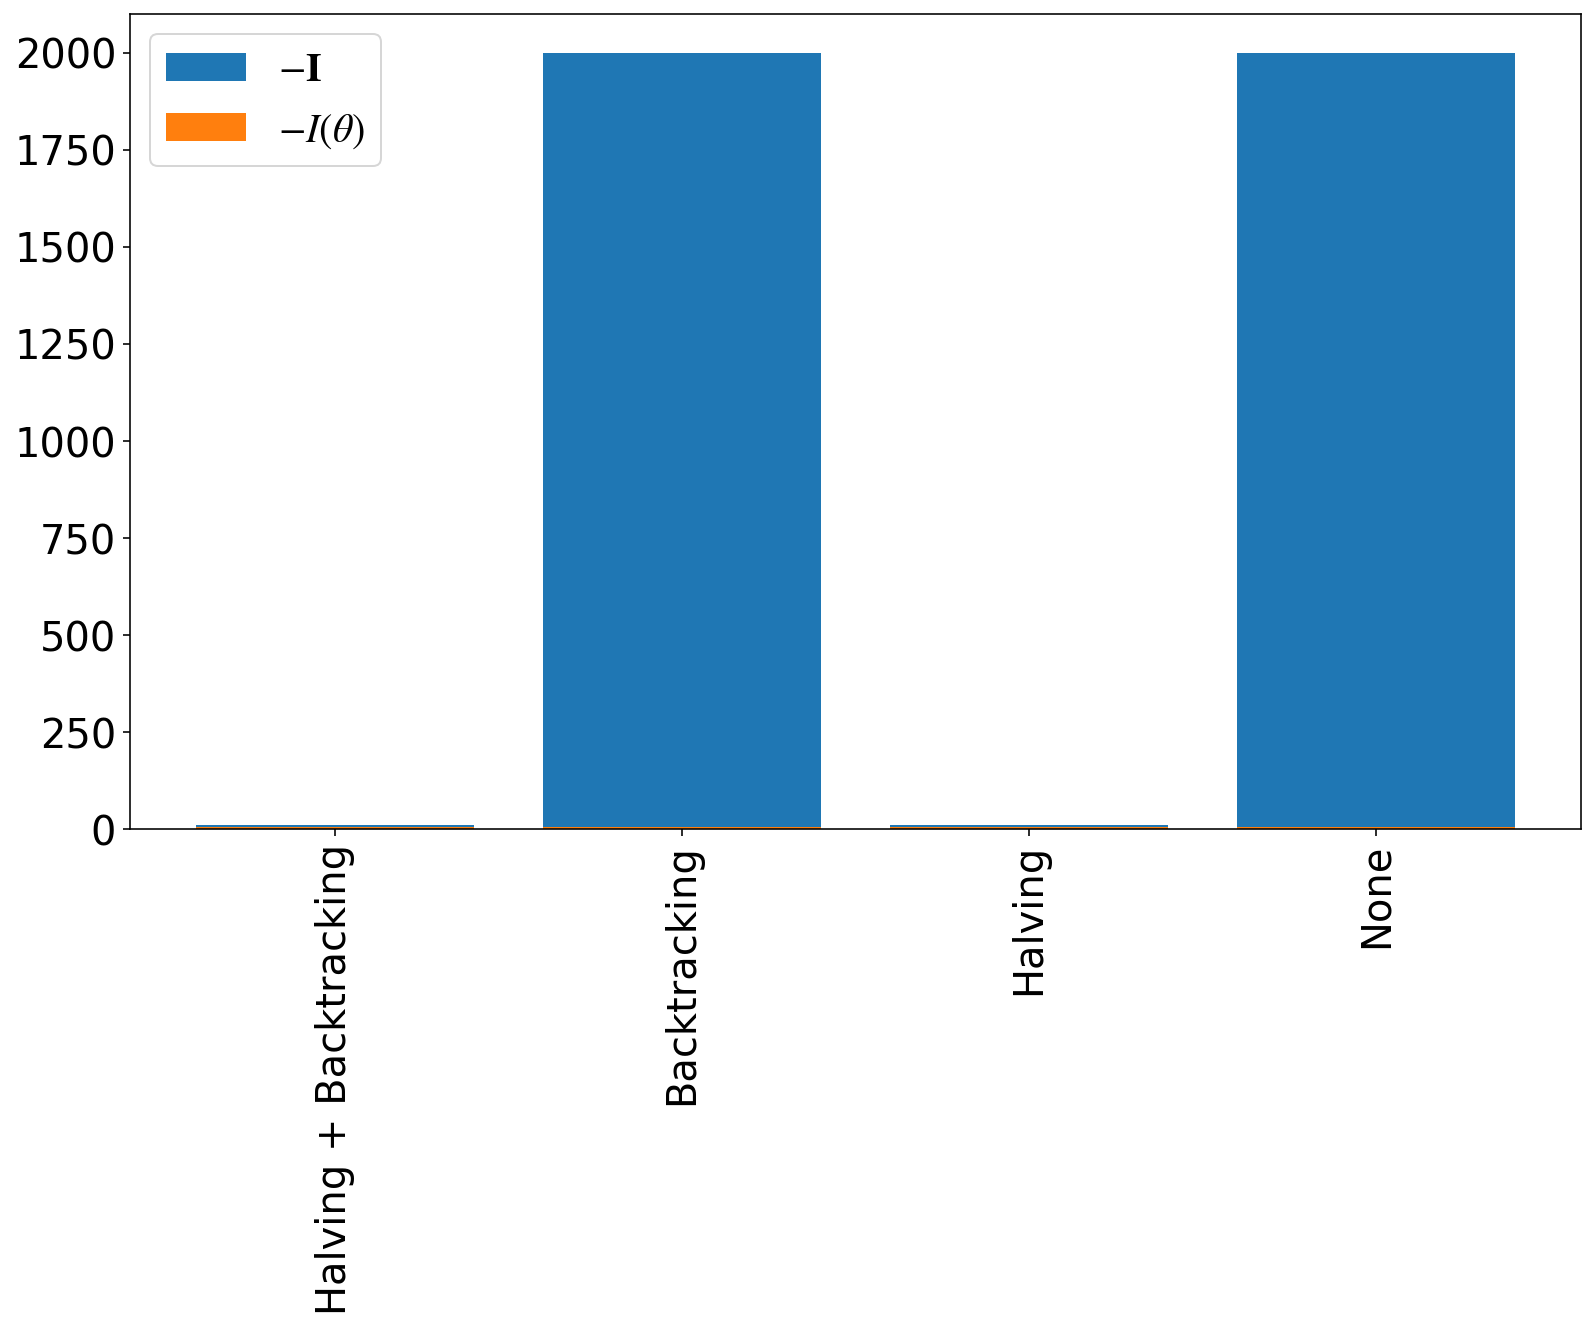

In [9]:


def is_positive_definite(A):
    if np.any(np.iscomplex(A)):
        exception('Matrix A must be real.')
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False


def update_quasi_hessian(n_spills, rate_list, ship_mat, prev_quasi_hessian,
                         use_backtracking=True):
    prev_rate = rate_list[-2]
    new_rate = rate_list[-1]
    prev_ll_p = ll_prime(n_spills, prev_rate, ship_mat)
    new_ll_p = ll_prime(n_spills, new_rate, ship_mat)
    rate_delta = new_rate - prev_rate
    prime_delta = new_ll_p - prev_ll_p
    v = prime_delta - prev_quasi_hessian @ rate_delta
    denom = v @ rate_delta
    if denom == 0:
        return prev_quasi_hessian
    else:
        c = 1 / (v @ rate_delta)
        new_quasi_hessian = prev_quasi_hessian + c * np.outer(v, v)
        if use_backtracking:
            while (not is_positive_definite(-new_quasi_hessian)):
                c = c / 2
                new_quasi_hessian = prev_quasi_hessian + c * np.outer(v, v)
    return new_quasi_hessian


def get_quasi_update(n_spills, rate, step_size, quasi_hessian,
                     use_step_halving=True):
    ll_prev = log_likelihood(n_spills, rate, ship_mat)
    ll_p = ll_prime(n_spills, rate, ship_mat)
    new_rate = rate - step_size * np.linalg.solve(quasi_hessian, ll_p)
    ll_new = log_likelihood(n_spills, new_rate, ship_mat)
    if use_step_halving:
        while (not np.isfinite(ll_new)) | (ll_new < ll_prev):
            step_size = step_size / 2
            new_rate = (
                rate + step_size * np.linalg.solve(quasi_hessian, ll_p)
            )
            ll_new = log_likelihood(n_spills, new_rate, ship_mat)
        if np.allclose(new_rate, rate):
            new_rate = new_rate * 1.01
    return new_rate


def quasi_newton(n_spills, init_rate, ship_mat, init_step, init_quasi_hessian,
                 use_step_halving=True, use_backtracking=True, max_iter=2000):
    ll_p = ll_prime(n_spills, init_rate, ship_mat)
    new_rate = get_quasi_update(n_spills, init_rate, init_step,
                                init_quasi_hessian,
                                use_step_halving=use_step_halving)
    rate_list = np.vstack((init_rate, new_rate))
    prev_quasi_hessian = init_quasi_hessian
    new_quasi_hessian = update_quasi_hessian(n_spills, rate_list, ship_mat,
                                             prev_quasi_hessian,
                                             use_backtracking=use_backtracking)
    iter_ = 1
    if use_step_halving:
        def continue_cond():
            return not has_relative_convergence(rate_list)
    else:
        def continue_cond():
            return (
                (iter_ < max_iter) & (not has_relative_convergence(rate_list))
            )
    # while not has_relative_convergence(rate_list):
    while continue_cond():
        prev_rate = rate_list[-1]
        ll_p = ll_prime(n_spills, prev_rate, ship_mat)
        new_quasi_hessian = update_quasi_hessian(
            n_spills,
            rate_list,
            ship_mat,
            prev_quasi_hessian,
            use_backtracking=use_backtracking
        )
        new_rate = prev_rate - np.linalg.solve(new_quasi_hessian, ll_p)
        prev_quasi_hessian = new_quasi_hessian
        rate_list = np.vstack((rate_list, new_rate))
        iter_ += 1
    return rate_list


init_quasi_hess = -fisher_scoring(init_guess, ship_mat)
init_quasi_hess = -np.eye(2)
quasi_hess_list = [-np.eye(2), -fisher_scoring(init_guess, ship_mat)]
lists = [[], []]
for idx, quasi_hess in zip(range(len(quasi_hess_list)), quasi_hess_list):
    assert_str = "Negative quasi hessian is not positive definite"
    assert is_positive_definite(-quasi_hess), assert_str
    quasi_log = quasi_newton(n_spills, init_guess, ship_mat, 1, quasi_hess)
    divergent_quasi_log = quasi_newton(n_spills, init_guess, ship_mat, 1,
                                       quasi_hess, use_step_halving=False)
    no_backtracking = quasi_newton(n_spills, init_guess, ship_mat, 1,
                                   quasi_hess, use_backtracking=False)
    neither = quasi_newton(n_spills, init_guess, ship_mat, 1,
                           quasi_hess, use_step_halving=False,
                           use_backtracking=False)
    if idx == 0:
        eye_quasi_table = get_table(quasi_log)
        eye_diverge_table = get_table(divergent_quasi_log)
    else:
        fish_quasi_table = get_table(quasi_log)
        fish_diverge_table = get_table(divergent_quasi_log)
    lists[idx] = [len(quasi_log) - 1, len(divergent_quasi_log) - 1,
                  len(no_backtracking) - 1, len(neither) - 1]
fish_iter_list = lists[1]
eye_iter_list = lists[0]


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = range(len(eye_iter_list))
ax.bar(x, eye_iter_list, label=r'$-\mathbf{I}$')
ax.bar(x, fish_iter_list, label=r'$-I(\theta)$')
ax.set_xticks(x)
ax.set_xticklabels(['Halving + Backtracking', 'Backtracking', 'Halving', 'None'])
plt.xticks(rotation=90)
ax.legend();

In [10]:
eye_diverge_table

,alpha,var_cov
iteration,,
1996,"[3.5055204275192075e+21, 2.303989537117588e+21]","[[1.4047886454821112e+42, -1.4989600973787518e..."
1997,"[3.505975701509711e+21, 2.3042887641602848e+21]","[[1.40515355863942e+42, -1.4993494728649305e+4..."
1998,"[3.5064309755002156e+21, 2.3045879912029815e+21]","[[1.405518519186183e+42, -1.499738898917366e+4..."
1999,"[3.506886249490719e+21, 2.304887218245679e+21]","[[1.4058835271223933e+42, -1.500128375536048e+..."
2000,"[3.507341523481223e+21, 2.3051864452883756e+21]","[[1.4062485824480528e+42, -1.5005179027209803e..."


In [11]:
fish_diverge_table

,alpha,var_cov
iteration,,
2,"[1.10799, 0.92141]","[[0.15313, -0.16882], [-0.16882, 0.30703]]"
3,"[1.09725, 0.93766]","[[0.15183, -0.16807], [-0.16807, 0.30773]]"
4,"[1.09722, 0.93761]","[[0.15182, -0.16806], [-0.16806, 0.3077]]"
5,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
6,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"


In [12]:
eye_quasi_table

,alpha,var_cov
iteration,,
7,"[1.09098, 0.9378]","[[0.15046, -0.1667], [-0.1667, 0.30566]]"
8,"[1.09729, 0.93681]","[[0.15178, -0.16799], [-0.16799, 0.30751]]"
9,"[1.09722, 0.93741]","[[0.1518, -0.16804], [-0.16804, 0.30765]]"
10,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
11,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"


In [13]:
fish_quasi_table

,alpha,var_cov
iteration,,
2,"[1.10799, 0.92141]","[[0.15313, -0.16882], [-0.16882, 0.30703]]"
3,"[1.09725, 0.93766]","[[0.15183, -0.16807], [-0.16807, 0.30773]]"
4,"[1.09722, 0.93761]","[[0.15182, -0.16806], [-0.16806, 0.3077]]"
5,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"
6,"[1.09715, 0.93755]","[[0.1518, -0.16804], [-0.16804, 0.30767]]"


In [14]:
eye_iter_list

[11, 2000, 11, 2000]

In [15]:
fish_iter_list

[6, 6, 6, 6]

Step-halving and backtracking proved unnecessary for the negative Fisher-Scoring approximation, but for the negative identity approximation, the results diverged when step-halving was *not* performed. When step-halving was included, the negative identity approximation found the solution within 11 iterations, so it is a good starting $\mathbf{M}$ so long as step-halving is active.

 ---
 <br>
 <br>

 #### (g) Construct a graph resembling Figure 2.8 that compares the paths taken by methods used in (a) - (f).
 Choose the plotting region and starting point to best illustrate the features
 of the algorithms' performance.

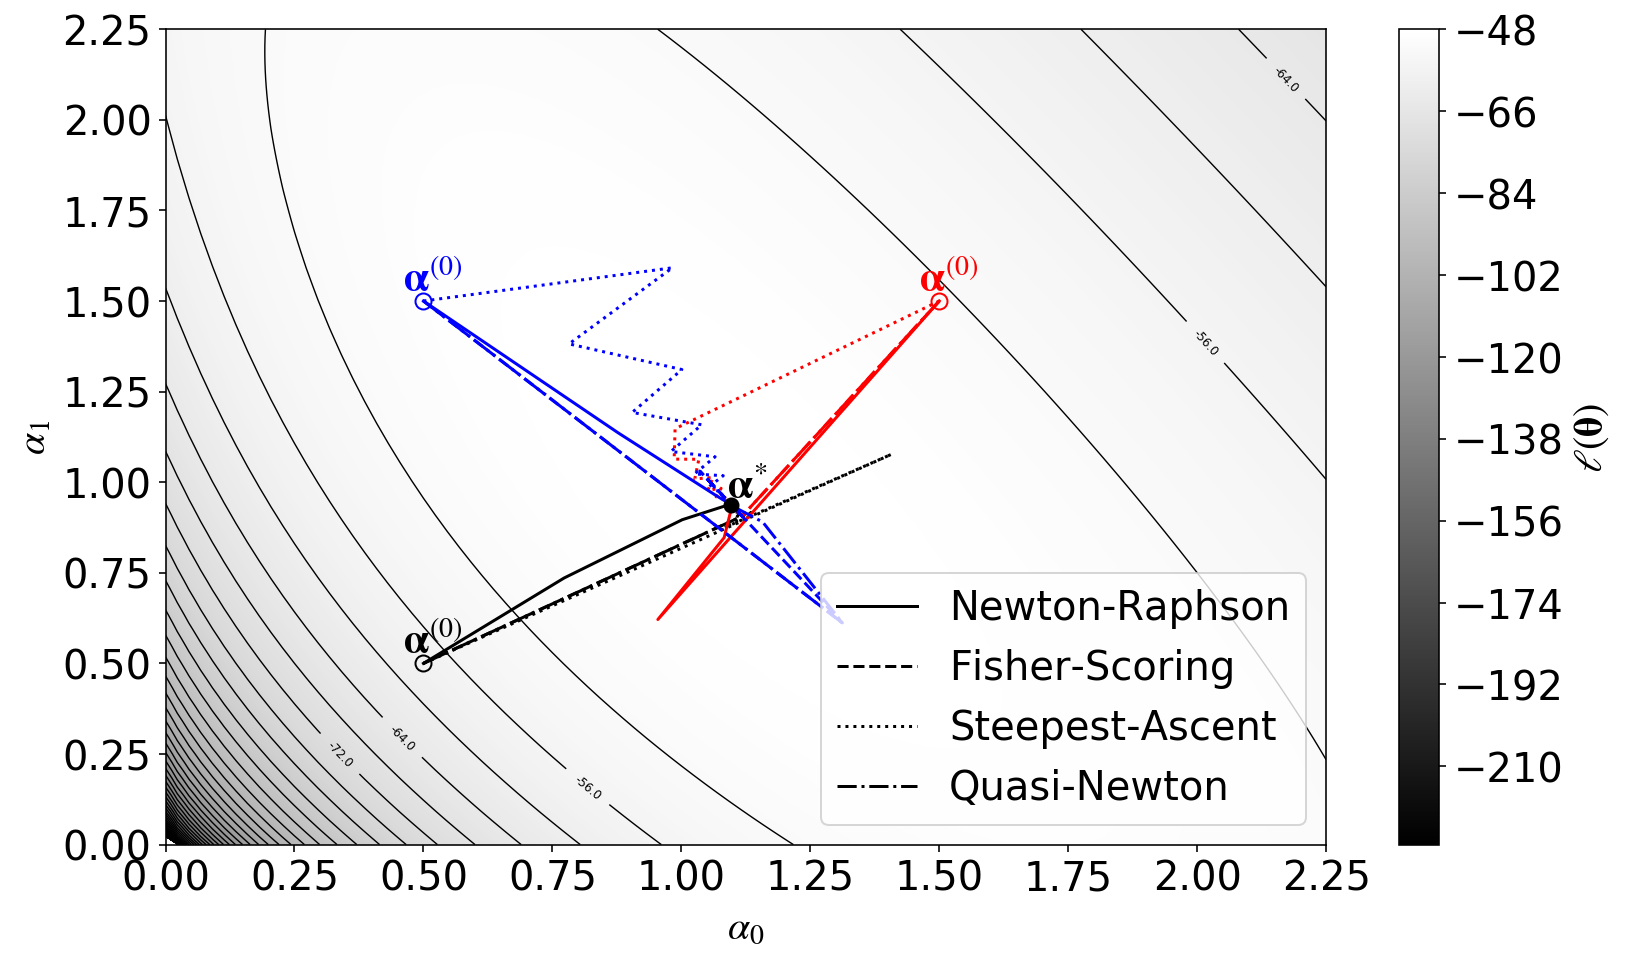

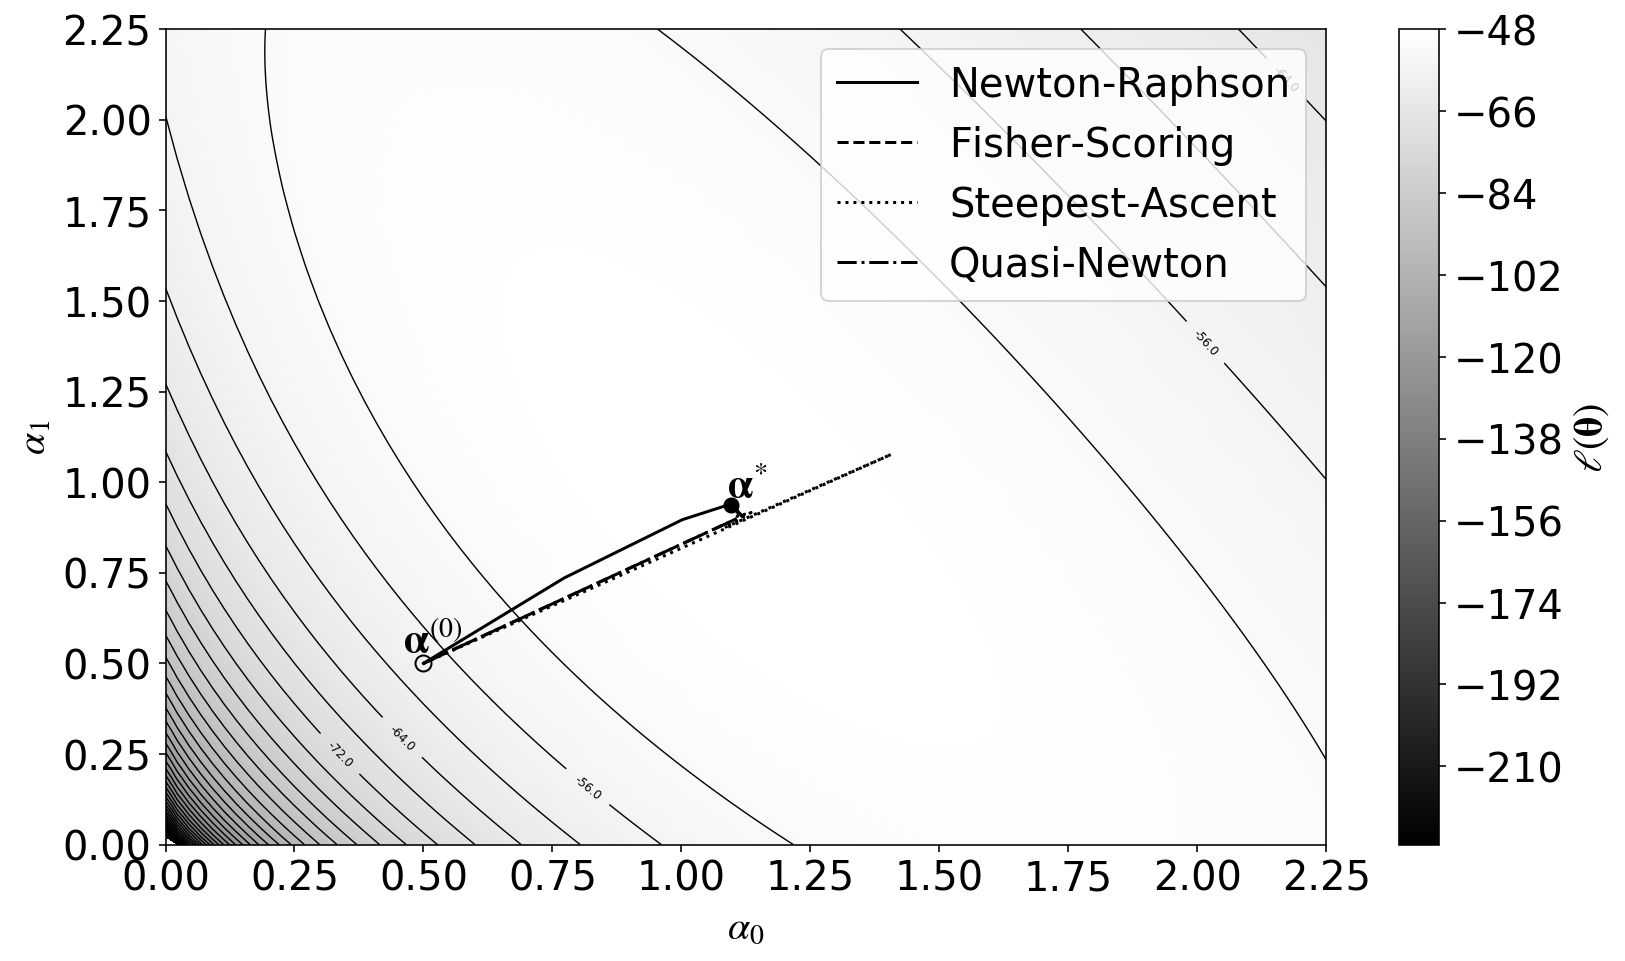

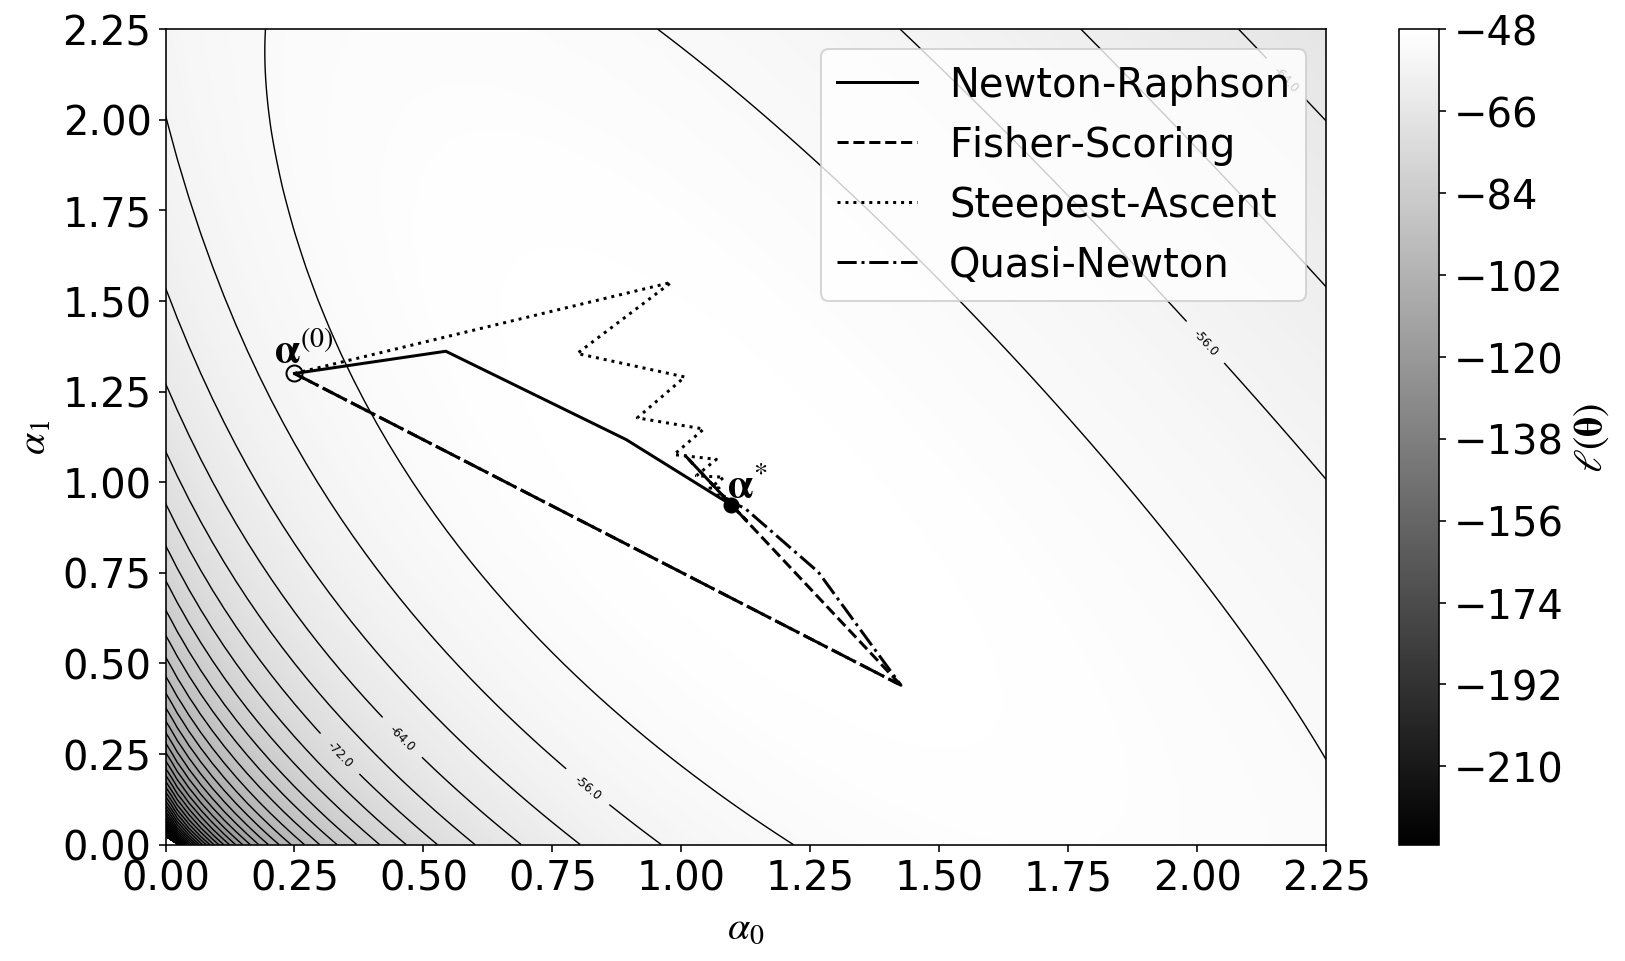

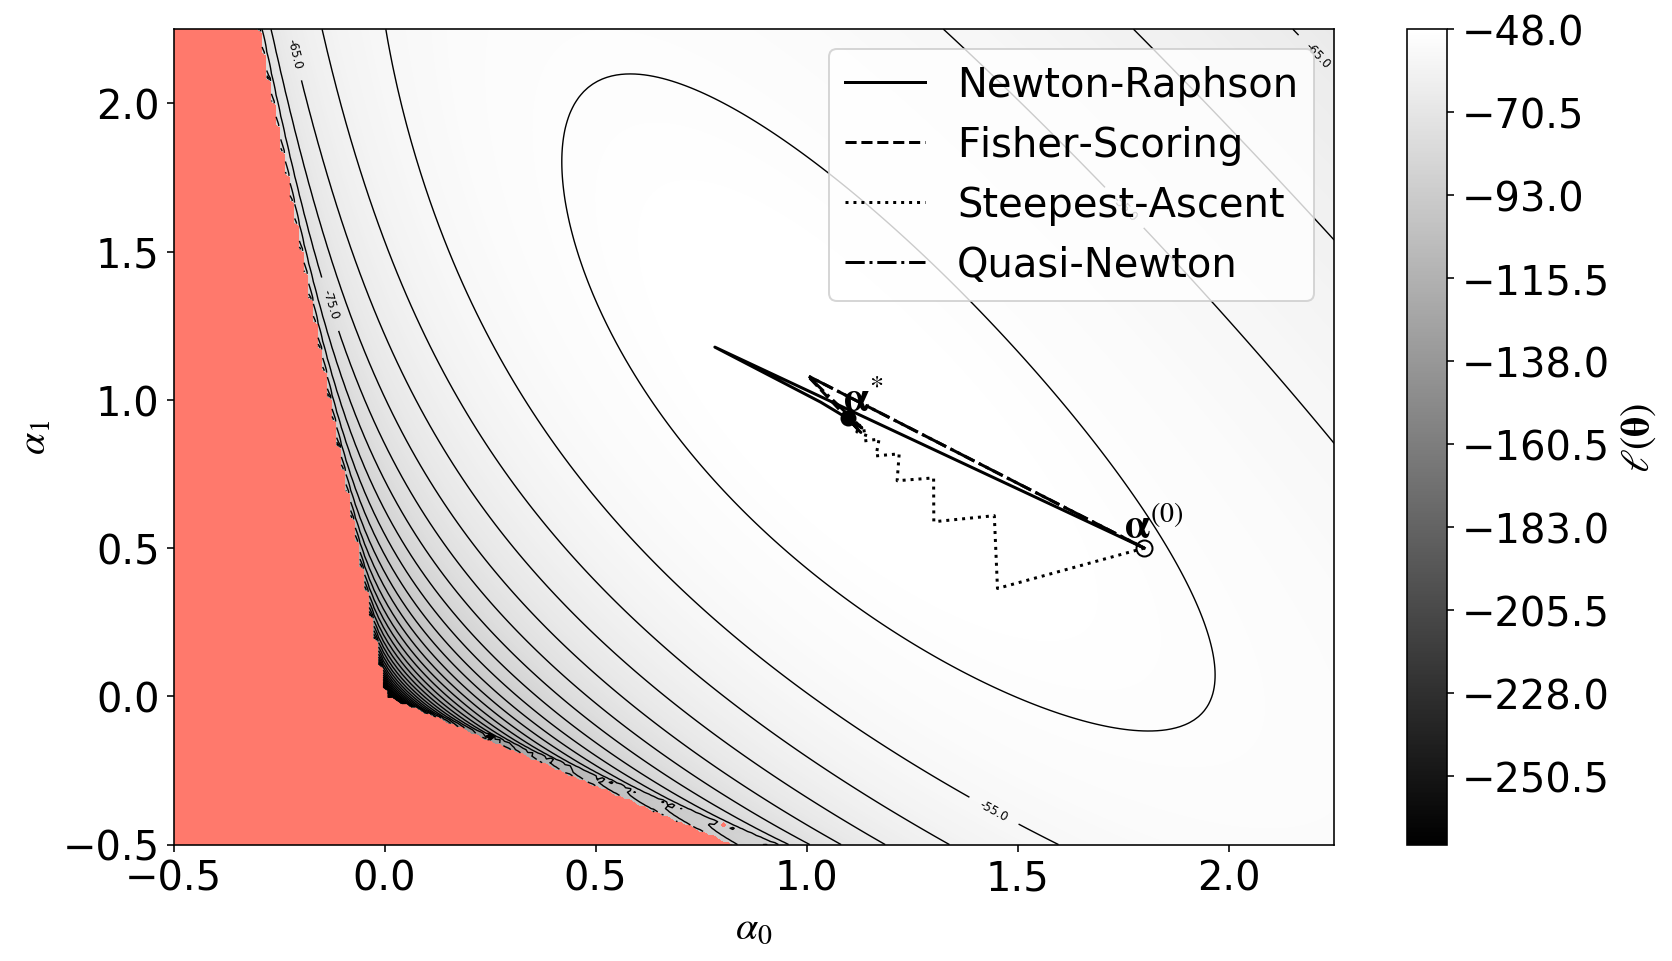

In [16]:
# Make the plot
def make_plot(n_points=100, alpha_min=0, alpha_max=2.25, n_lvl=50):
    spill_rates = np.linspace(alpha_min, alpha_max, n_points)
    alph_0, alph_1 = np.meshgrid(spill_rates, spill_rates)
    loglike = np.full_like(alph_0, np.nan, dtype=float)
    for idx in range(alph_0.size):
        alpha = np.array([alph_0.flat[idx], alph_1.flat[idx]])
        loglike.flat[idx] = log_likelihood(n_spills, alpha, ship_mat)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    c_shade = ax.contourf(
        alph_0, alph_1, loglike, cmap='gray', levels=n_lvl * 10
    )
    cbar = fig.colorbar(c_shade)
    cbar.set_label(r'$\ell(\mathbf{{\theta}})$')
    c_lines = ax.contour(alph_0, alph_1, loglike, colors='k', linestyles='-',
                         levels=n_lvl, linewidths=0.7)
    ax.clabel(c_lines, c_lines.levels[-1:-9:-2], fmt='%2.1f', fontsize=6)
    ax.set_xlabel(f'$\\alpha_{{0}}$')
    ax.set_ylabel(f'$\\alpha_{{1}}$')
    return (fig, ax)


def make_surf(n_points=100, alpha_min=0.1, alpha_max=2.25, n_lvl=50):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    spill_rates = np.linspace(alpha_min, alpha_max, n_points)
    alph_0, alph_1 = np.meshgrid(spill_rates, spill_rates)
    loglike = np.full_like(alph_0, np.nan, dtype=float)
    for idx in range(alph_0.size):
        alpha = np.array([alph_0.flat[idx], alph_1.flat[idx]])
        loglike.flat[idx] = log_likelihood(n_spills, alpha, ship_mat)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    c_surf = ax.plot_surface(alph_0, alph_1, loglike, rstride=5, cstride=5,
                             cmap=cm.viridis, linewidth=0, antialiased=False)
#     cbar = fig.colorbar(c_surf)
    ax.set_zlabel(r'$\ell(\mathbf{{\theta}})$')
    ax.set_xlabel(f'$\\alpha_{{0}}$')
    ax.set_ylabel(f'$\\alpha_{{1}}$')
    return (fig, ax)


# make_surf()


def add_lines(ax, log_vars, line_styles=None, legend_entries=None,
              linewidth=1.5, color='k'):
    make_legend = True
    if legend_entries is None:
        legend_entries = np.full_like(log_vars, None)
        make_legend = False
    if line_styles is None:
        line_styles = np.full_like(log_vars, None)
    for log, entry, style in zip(log_vars, legend_entries, line_styles):
        ax.plot(log[:, 0], log[:, 1], color=color, linewidth=linewidth,
                label=entry, linestyle=style)
    if make_legend:
        ax.legend()
    ax.plot(log[0, 0], log[0, 1], color=color, marker='o', markersize=8,
            fillstyle='none')
    ax.annotate(r'$\mathbf{\alpha}^{(0)}$',
                xy=(log[0, 0], log[0, 1]),
                textcoords='offset points',
                xytext=(-10, 6),
                color=color)


def add_optimal(ax, alpha, offset=(8, 10), color='k'):
    ax.plot(alpha[0], alpha[1], color=color, marker='.', markersize=14)
    ax.annotate(r'$\mathbf{\alpha}^{*}$',
                xy=(alpha[0], alpha[1]),
                textcoords='offset points',
                xytext=offset,
                color=color,
                horizontalalignment='center',
                verticalalignment='center')


def run_all(init_guess):
    newt_raph_log = newt_raph(n_spills, init_guess, ship_mat)
    fish_log = newt_raph(n_spills, init_guess, ship_mat, use_fisher=True)
    steep_log = steep_ascent(n_spills, init_guess, ship_mat, init_step=2)
    init_quasi_hess = -fisher_scoring(init_guess, ship_mat)
    quasi_log = quasi_newton(n_spills, init_guess, ship_mat, 1,
                             init_quasi_hess)
    logs = (newt_raph_log, fish_log, steep_log, quasi_log)
    return logs


fig1, ax1 = make_plot()
logs = (newt_raph_log, fish_log, steep_log, quasi_log)
entries = ('Newton-Raphson', 'Fisher-Scoring', 'Steepest-Ascent',
           'Quasi-Newton')
styles = ('-', '--', ':', '-.')
add_lines(ax1, logs, styles, entries)

logs = run_all(np.array([1.5, 1.5]))
add_lines(ax1, logs, styles, color='r')

logs = run_all(np.array([0.5, 1.5]))
add_lines(ax1, logs, styles, color='b')

add_optimal(ax1, newt_raph_log[-1])

guesses = np.array([[0.50, 0.50],
                    [0.25, 1.30],
                    [1.80, 0.50]])
for guess in guesses:
    if np.array_equal(guess, guesses[2]):
        fig, ax = make_plot(n_points=250, alpha_min=-0.5)
        ax.set_facecolor('xkcd:salmon')
    else:
        fig, ax = make_plot()
    logs = run_all(guess)
    add_lines(ax, logs, styles, entries)
    add_optimal(ax, newt_raph_log[-1])

plt.show()

The Steepese-Ascent algorithm consistently took the most iterations to find the solution, and the Quasi-Newton approach always found the solution quickly. If I were to optimize the algorithms by moving the linear algebra solver calls outside of the backtracking and step-halving `while` loops, then the computational savings of the Quasi-Newton method would be significant.

> *Note*: Pink is `NaN`